# Exploring Dandiset 000690: Vision-to-Hippocampus Large-Scale Electrophysiology

**AI-Generated Notebook**:  
This notebook was generated with the assistance of AI. Please use caution when interpreting the code and analysis, and double-check any results before drawing conclusions for scientific research.

## Overview

**Dandiset 000690** ("Allen Institute Openscope - Vision2Hippocampus project") contains large-scale extracellular electrophysiology data recorded using Neuropixels 1.0 probes in mice. The project aims to understand how neural representations of visual stimuli evolve across brain regions, from the thalamus and visual cortex to the hippocampus.

- __Visual stimuli__: Moving bars of light (varied width, contrast, color) and movies (e.g., containing eagles, squirrels).
- __Species__: Mouse (Mus musculus)
- __Techniques__: Multi-electrode extracellular recording
- __File format__: Neurodata Without Borders (NWB)
- __Data Scope__: LFPs (local field potentials), spike sorted units, metadata, high-density recordings

[Explore the Dandiset online](https://dandiarchive.org/dandiset/000690/0.250326.0015)

This notebook will guide you through:
1. Accessing and listing files in the Dandiset using the DANDI API.
2. Streaming NWB files and loading their contents for initial exploration.
3. Visualizing local field potentials (LFPs) and electrode metadata.

_The notebook provides code examples and brief explanations as a starting point for your own re-analysis._

## Required Packages

The following Python packages are required (and assumed to be installed):

- `dandi` (for accessing the DANDI API)
- `pynwb` (for working with NWB data)
- `remfile` (for remote file streaming)
- `h5py` (for underlying HDF5 access)
- `matplotlib` (for plots)
- `pandas` (for table processing)
- `numpy` (for numerical operations)

You do not need to run any pip install commands; the notebook assumes the environment is prepared.

## 1. Accessing Dandiset 000690 with the DANDI API

We'll start by connecting to the DANDI Archive using the API and list a sample asset. This demonstrates how to enumerate and select files for loading.

In [1]:
from dandi.dandiapi import DandiAPIClient

# This is the Dandiset ID and version we wish to explore
dandiset_id = "000690"
dandiset_version = "0.250326.0015"

# Connect to the API and get the Dandiset object
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first few NWB files from the Dandiset as an example
print("Listing the first 5 NWB assets:")
for i, asset in enumerate(dandiset.get_assets()):
    print(asset.path)
    if i >= 4:
        break

Listing the first 5 NWB assets:
sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
sub-692077/sub-692077_ses-1300222049.nwb


We will work with one file as an example:

```
sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
```
This file contains local field potential (LFP) recordings, channel metadata, and more from one probe in one mouse session.

## 2. Streaming and Exploring NWB Files

Rather than downloading large files, we'll _stream_ an NWB file directly for exploration.

**We'll:**
- Load the NWB file info (using `remfile`/`h5py`/`pynwb`)
- Preview experimental session metadata
- Check the available LFP data and electrode information

In [2]:
import remfile
import h5py
import pynwb

# Specify the path to a sample NWB file in this dandiset
example_asset_path = "sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb"

# Get the remote download URL for the selected asset
asset = next(dandiset.get_assets_by_glob(example_asset_path))
url = asset.download_url

# Open the remote file using remfile
remote_file = remfile.File(url)

# Access as an HDF5 file object
h5_file = h5py.File(remote_file)

# Use pynwb to read the NWB structure (do not load all data into memory)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Preview the NWB file object
print(nwb)

root pynwb.file.NWBFile at 0x135046058159968
Fields:
  acquisition: {
    probe_4_lfp <class 'pynwb.ecephys.LFP'>,
    probe_4_lfp_data <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    probeF <class 'abc.EcephysProbe'>
  }
  electrode_groups: {
    probeF <class 'abc.EcephysElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2023, 11, 16, 2, 47, 21, 734893, tzinfo=tzoffset(None, -28800))]
  identifier: 4
  institution: Allen Institute for Brain Science
  session_description: LFP data and associated info for one probe
  session_id: 1300222049
  session_start_time: 2023-09-28 00:00:00-07:00
  stimulus_notes: OpenScopeVision2Hippocampus
  subject: subject abc.EcephysSpecimen at 0x135046058293440
Fields:
  age: P89D
  age__reference: birth
  age_in_days: 89.0
  genotype: wt/wt
  sex: F
  species: Mus musculus
  specimen_name: 692077
  strain: Transgenic
  subject_id: 692077

  timestamps_reference_time: 

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Session and Subject Metadata

Let's view some high-level information about the recording session and the animal subject.

In [3]:
from datetime import datetime

# Session-level metadata
print("Session ID:", nwb.session_id)
print("Session Description:", nwb.session_description)
print("Session Start Time:", nwb.session_start_time)
print("Institution:", nwb.institution)
print("Stimulus Notes:", nwb.stimulus_notes)

# Subject metadata
subj = nwb.subject
print("\nSubject ID:", subj.subject_id)
print("Genotype:", subj.genotype)
print("Sex:", subj.sex)
print("Species:", subj.species)
print("Age (days):", subj.age_in_days)
print("Strain:", subj.strain)

Session ID: 1300222049
Session Description: LFP data and associated info for one probe
Session Start Time: 2023-09-28 00:00:00-07:00
Institution: Allen Institute for Brain Science
Stimulus Notes: OpenScopeVision2Hippocampus

Subject ID: 692077
Genotype: wt/wt
Sex: F
Species: Mus musculus
Age (days): 89.0
Strain: Transgenic


## 3. Inspecting LFP Data Structures

Each probe's LFP data is stored as an `ElectricalSeries` object within the NWB file's acquisition group.

We'll preview:
- LFP data shape and type
- Timestamps
- Units and conversion
- Sampling rate

In [4]:
# The LFP data for this probe
probe_4_lfp = nwb.acquisition["probe_4_lfp"]
lfp_es = probe_4_lfp.electrical_series["probe_4_lfp_data"]

print("LFP Data shape (samples x channels):", lfp_es.data.shape)
print("Number of Samples: ", lfp_es.data.shape[0])
print("Number of Channels: ", lfp_es.data.shape[1])
print("Data dtype:", lfp_es.data.dtype)
print("Timestamps shape:", lfp_es.timestamps.shape)
print("Units:", lfp_es.unit)
print("Conversion factor:", lfp_es.conversion)
print("Offset:", lfp_es.offset)
print("Resolution (if known):", lfp_es.resolution)
print("Timestamps unit:", lfp_es.timestamps_unit)

# Sampling rate is given in the electrode group
eg = nwb.electrode_groups["probeF"]
print("LFP sampling rate (Hz):", eg.lfp_sampling_rate)

LFP Data shape (samples x channels): (8962735, 96)
Number of Samples:  8962735
Number of Channels:  96
Data dtype: float32
Timestamps shape: (8962735,)
Units: volts
Conversion factor: 1.0
Offset: 0.0
Resolution (if known): -1.0
Timestamps unit: seconds
LFP sampling rate (Hz): 625.0


## 4. Electrode Table and Metadata

Each LFP channel corresponds to an electrode with associated metadata (e.g., location, position on probe, filtering).

We'll load the electrode table into a DataFrame for easy inspection.

In [5]:
import pandas as pd

# Convert the electrode table to a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()

# Display the first few rows
print("Electrode table columns:", electrodes_df.columns.tolist())
electrodes_df.head()

Electrode table columns: ['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
4002,DP,probeF abc.EcephysElectrodeGroup at 0x13504605...,probeF,40,59,4,2,True,3523.0,4566.0,5834.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4006,DP,probeF abc.EcephysElectrodeGroup at 0x13504605...,probeF,80,59,4,6,True,3531.0,4533.0,5848.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4010,DP,probeF abc.EcephysElectrodeGroup at 0x13504605...,probeF,120,59,4,10,True,3538.0,4501.0,5862.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4014,DP,probeF abc.EcephysElectrodeGroup at 0x13504605...,probeF,160,59,4,14,True,3548.0,4461.0,5879.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4018,DP,probeF abc.EcephysElectrodeGroup at 0x13504605...,probeF,200,59,4,18,True,3554.0,4429.0,5893.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


**Summary of electrode table columns:**

- `location`: anatomical/brain region
- `group_name`: which probe
- `probe_vertical_position`, `probe_horizontal_position`: channel position on device (microns)
- `probe_id`, `local_index`: channel identifiers
- `valid_data`: usage flag
- `x`, `y`, `z`: recording position in brain coordinates
- `imp`: impedance (ohms)
- `filtering`: hardware filtering applied

### Visualize Electrode Positions and Regions

Let's plot the distribution of electrodes by their annotated brain region (`location`).  
We'll also show their physical vertical positions along the probe.

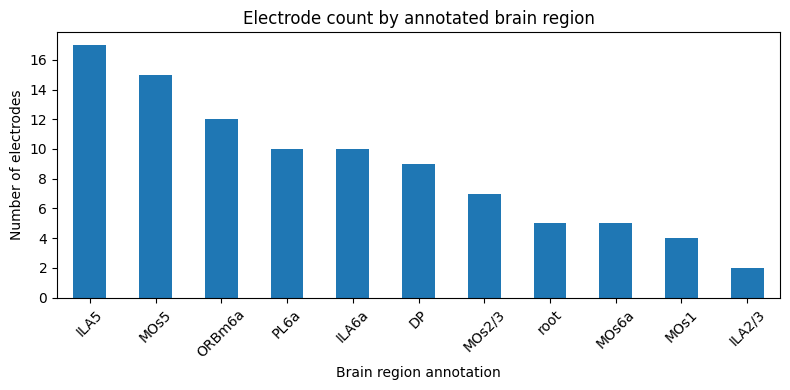

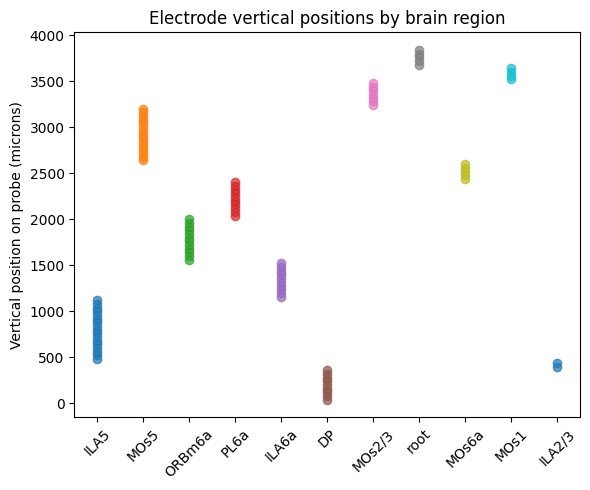

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
region_counts = electrodes_df['location'].value_counts()

region_counts.plot(kind='bar', ax=ax)
ax.set_ylabel('Number of electrodes')
ax.set_xlabel('Brain region annotation')
ax.set_title('Electrode count by annotated brain region')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Visualize the vertical positions on the probe
fig, ax = plt.subplots(figsize=(6, 5))
for reg in region_counts.index:
    subset = electrodes_df[electrodes_df.location == reg]
    ax.scatter(
        [reg]*len(subset),
        subset['probe_vertical_position'],
        label=reg,
        alpha=0.7
    )
ax.set_ylabel('Vertical position on probe (microns)')
ax.set_title('Electrode vertical positions by brain region')
ax.set_xticks(range(len(region_counts.index)))
ax.set_xticklabels(region_counts.index, rotation=45)
plt.tight_layout()
plt.show()

## 5. Visualizing LFP Traces from Selected Channels

We'll plot LFP traces from a small subset of (randomly chosen) channels to illustrate the data and timing.

**Note:** When using h5py (which is how .data is stored), multi-dimensional advanced (fancy) indexing requires indices to be in strictly increasing order. We'll sort the randomly chosen indices before slicing so this works correctly.

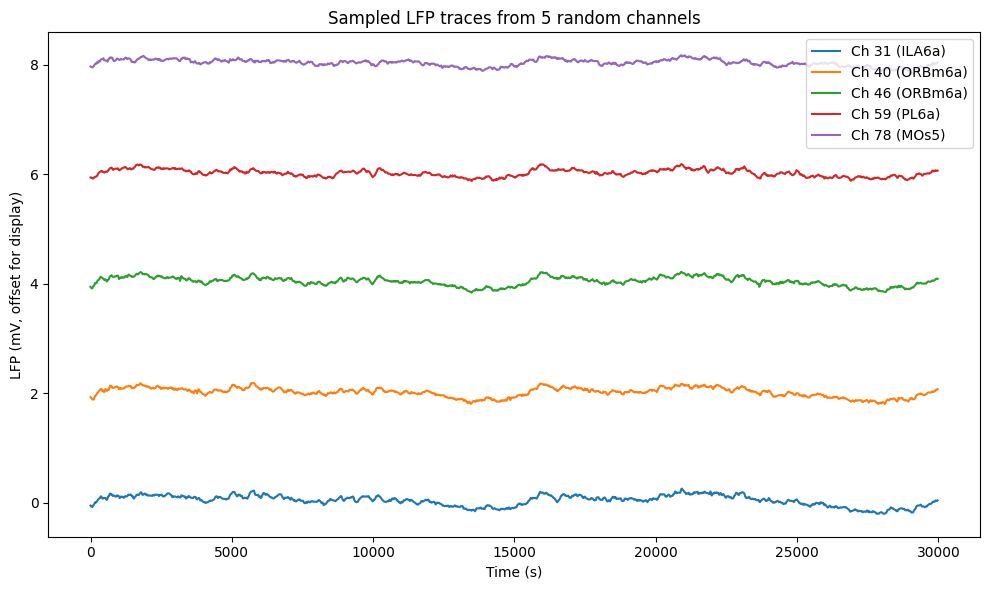

In [7]:
import numpy as np

# Choose a window to plot (e.g., first 2 seconds of data)
sampling_rate = eg.lfp_sampling_rate  # Hz
seconds_to_plot = 2
num_samples = int(sampling_rate * seconds_to_plot)

# Choose a few random channels to plot (e.g., 5 channels), sort them for h5py
np.random.seed(1)
channels_unsorted = np.random.choice(lfp_es.data.shape[1], 5, replace=False)
channels = np.sort(channels_unsorted)

channel_labels = [electrodes_df.iloc[ch]["location"] for ch in channels]

# Load the data for plotting (samples, channels)
lfp_chunk = lfp_es.data[:num_samples, channels]
time = lfp_es.timestamps[:num_samples]

plt.figure(figsize=(10, 6))
offset = 0
yticks = []
for i, ch in enumerate(channels):
    # Offset each channel vertically for clarity
    plt.plot(time, lfp_chunk[:, i] * 1e3 + offset, label=f"Ch {ch} ({channel_labels[i]})")
    yticks.append(offset)
    offset += 2  # mV offset for next channel

plt.xlabel('Time (s)')
plt.ylabel('LFP (mV, offset for display)')
plt.title('Sampled LFP traces from 5 random channels')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## 6. Next Steps

In this notebook, you have learned how to:
- Connect to and navigate a large Dandiset in the DANDI Archive.
- Stream and preview NWB files directly, without downloading huge files.
- Inspect LFP (local field potential) and electrode metadata.
- Visualize recording traces and probe/channel distributions.

**You are now prepared to:**
- Explore additional sessions/probes.
- Dive deeper into spike/unit data and analysis.
- Explore stimulus timing and responses.

For more in-depth analysis, consider:
- Retrieving spike/unit and event data from the acquisition and units tables.
- Analyzing spectral properties, stimulus-locked responses, or inter-region interactions.
- Comparing across animals, regions and stimulus conditions using the detailed metadata.

See the [Dandiset page](https://dandiarchive.org/dandiset/000690/0.250326.0015) for further documentation, related resources, and citation details.

_**Happy exploring!**_